\begin{align}
  C = \int_{3}^{6} 4e^{-0.2x} \sin(x^2) \,dx
\end{align}

1. ***Faça um gráfico da função a ser integrada***

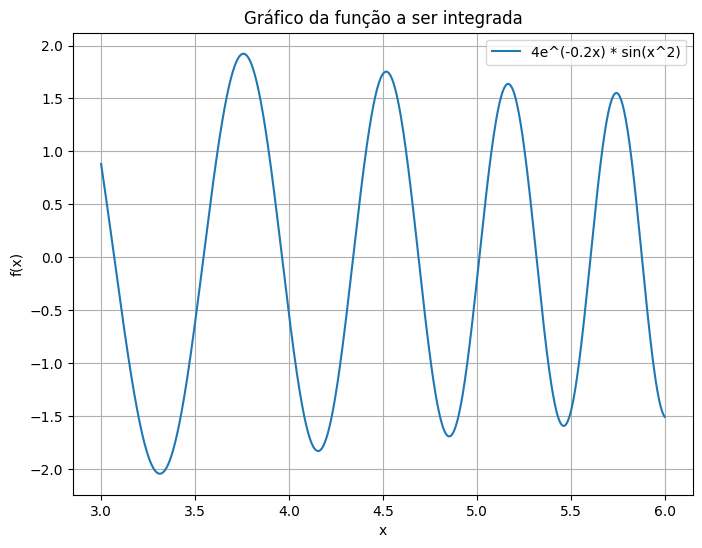

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função a ser integrada
def f(x):
    return 4 ** np.exp(-0.2 * x) * np.sin(x**2)

# Valores de x para o gráfico
x_vals = np.linspace(3, 6, 1000)  # Intervalo de 3 a 6

# Calcula os valores de y correspondentes
y_vals = f(x_vals)

# Plota o gráfico da função
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='4e^(-0.2x) * sin(x^2)')
plt.title('Gráfico da função a ser integrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


2. ***Escreva um código que, dado um inteiro $ n > 3 $, calcule uma aproximação da integral $C $ usando a regra composta do Trapézio com o valor $ n $ para a fórmula que está nas notas de aula. Calcule o resultado com $ n = 200 $.***

In [ ]:
def trapezoidal_rule_composite(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    result = h * (0.5 * y[0] + 0.5 * y[n] + np.sum(y[1:n]))
    return result

# Parâmetros
a = 3
b = 6
n = 200

# Calcular a aproximação da integral usando a regra composta do trapézio
approximation = trapezoidal_rule_composite(a, b, n)

# Exibir o resultado
print(f"A aproximação da integral usando a regra composta do trapézio com n={n} é: {approximation}")


A aproximação da integral usando a regra composta do trapézio com n=200 é: -0.29024375083720677


3. ***Escreva um código que, dado $n > 3$, calcule uma aproximação da integral $C$ usando a regra composta de Simpson com o valor $n$ para a fórmula que está nas notas de aula. Calcule o resultado com $n = 200$.***


In [ ]:
#Definindo a função a ser integrada:
def integrand(x):
    return 4 * np.exp(-0.2*x) * np.sin(x**2)

#Definindo a regra composta de Simpson
def simpson_rule(f, a, b, n):
    #Verifica se n é par
    if n % 2 == 1:
        raise ValueError("Não é par.")

    #Gera n pontos igualmente espaçados entre a e b
    x = np.linspace(a, b, n + 1)
    #Calcula os valores da função nesses pontos
    y = f(x)
    #Calcula a largura de cada subintervalo
    h = (b - a) / n

    #Calcula a integral com a regra de Simpson
    integral = (h / 3) * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))
    return integral

#Calcula a integral com n=200
n = 200
integral_approximation_simpson = simpson_rule(integrand, 3, 6, n)
integral_approximation_simpson


print(f"Aproximação da integral C com n={n}: {integral_approximation_simpson}")


Aproximação da integral C com n=200: -0.2998425244976006


 4. ***Calcule a ordem de convergência numérica da regra do Trapézio que foi usada. Siga o procedimento já conhecido: comece um valor de $N$ não muito grande e vá multiplicando por 2 e por 2 novamente, etc... Então encontre a razão dos erros consecutivo e o valor da ordem $p$. Você pode usar um valor de $N$ grande como aproximação do valor exato.***

 Para calcular a ordem de convergência numérica da regra do Trapézio, utilizamos valores de $N$ começando em 4 e dobrando sucessivamente até 512. Calculamos a integral com esses valores de $N$ e comparamos com uma aproximação "exata" obtida. A ordem de convergência $p$ pode ser estimada pela razão entre os erros consecutivos, esperando que $p$ se aproxime de 2 para a regra do Trapézio, que tem convergência quadrática.

In [ ]:
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)  # Pontos onde a função será avaliada
    y = f(x)                    # Valores da função nesses pontos
    h = (b - a) / n             # Largura dos subintervalos
    integral = (h/2) * np.sum(y[:-1] + y[1:])  # Aplicando a regra do trapézio
    return integral

# Definindo a função a ser integrada
def integrand(x):
    return x**2

# Aplicando a regra para diferentes valores de N começando de 4
N_values = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
integrals = [trapezoidal_rule(integrand, 3, 6, N) for N in N_values]

# Valor de referência para a integral
reference_integral = integrals[-1]

# Calculando os erros
errors = [abs(reference_integral - integral) for integral in integrals[:-1]]

# Razão entre os erros consecutivos
error_ratios = [errors[i] / errors[i+1] for i in range(len(errors)-1)]

# Estimando a ordem de convergência p
p_values = [np.log2(ratio) for ratio in error_ratios]

# Resultados
print(f'Erros: {errors}')
print(f'Razões entre erros consecutivos: {error_ratios}')
print(f'Estimativas da ordem de convergência p: {p_values}')


: 

5. ***Calcule a ordem de convergência numérica da regra do Simpson  repetindo a mesma análise.***

In [ ]:
#Função que implementa a regra de Simpson para um número par de subintervalos n
def simpson_rule(f, a, b, n):
    #Verifica se n é par
    if n % 2 != 0:
        raise ValueError("Não é par.")
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    integral = h/3 * (y[0] + 2 * np.sum(y[2:n:2]) + 4 * np.sum(y[1:n:2]) + y[n])
    return integral

#Para encontrar a ordem de convergência, calcule a integral para diferentes valores de N
#e compare os erros entre as aproximações sucessivas.
N_values = [16, 32, 64, 128, 256, 512, 1024, 2048]
simpson_integrals = [simpson_rule(integrand, 3, 6, N) for N in N_values]

#Calculando o erro usando a integral com N=1024 como referência
reference_integral = simpson_integrals[-1]
simpson_errors = [abs(reference_integral - integral) for integral in simpson_integrals[:-1]]

#Calculando as razões dos erros e a ordem de convergência p
simpson_error_ratios = [simpson_errors[i] / simpson_errors[i+1] for i in range(len(simpson_errors)-1)]
simpson_p_values = [np.log2(ratio) for ratio in simpson_error_ratios]

simpson_integrals, simpson_errors, simpson_error_ratios, simpson_p_values


([-0.29516542194959616,
  -0.29989021550226636,
  -0.299846740324675,
  -0.29984275839158475,
  -0.29984249460434353,
  -0.2998424778997273,
  -0.2998424768523401,
  -0.2998424767868263],
 [0.004677054837230132,
  4.773871544005992e-05,
  4.2635378487143605e-06,
  2.8160475845639965e-07,
  1.781751723939351e-08,
  1.1129009935828549e-09,
  6.551381659392064e-11],
 [97.97194570730707,
  11.196972358168509,
  15.140148455177743,
  15.804938178131106,
  16.009975138967295,
  16.987271562593204],
 [6.6142967871434655,
  3.4850367776749227,
  3.9203074464790837,
  3.982303486961276,
  4.000899162459431,
  4.08638224527783])

6. ***Considere a regra de integração elementar:***

\begin{align*}
  \int_{-1}^{1} f(x) \, dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
\end{align*}


***Resposta (a)*** A regra de integração de Gauss-Legendre para dois pontos é dada por:

$$\int_{-1}^{1} f(x) \, dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)$$

Agora, considerando a integral exata para um polinômio de grau $n$:
$$\int_{-1}^{1} P_n(x) \, dx $$

onde $P_n(x)$ é um polinômio de grau $n$. A regra de integração de Gauss-Legendre para dois pontos é exata para polinômios até grau $3$, então vamos considerar um polinômio de grau $3$ para demonstração.

Seja $P_3(x)$ um polinômio de grau $3$:

$$ P_3(x) = a_3x^3 + a_2x^2 + a_1x + a_0$$

Agora, vamos calcular a integral exata:

$$ \int_{-1}^{1} P_3(x) \, dx $$

Utilizando a propriedade de simetria dos pontos de avaliação para reduzir a integral:

$$ \int_{-1}^{1} P_3(x) \, dx = 2 \int_{0}^{1} P_3(x) \, dx $$

Agora, substituindo $P_3(x)$ na integral:

$$ 2 \int_{0}^{1} (a_3x^3 + a_2x^2 + a_1x + a_0) \, dx $$

Integrando termo a termo, obtemos:

$$ 2\left(\frac{a_3}{4} + \frac{a_2}{3} + \frac{a_1}{2} + a_0\right) $$

Comparando isso com a regra de Gauss-Legendre para dois pontos:

$$ f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right) $$

A ordem de exatidão é igual ao dobro do número de pontos de avaliação menos um. No caso da regra de Gauss-Legendre com dois pontos, a ordem de exatidão é $$2 \times 2 - 1 = 4-1=3$$. Portanto, a regra de Gauss-Legendre com dois pontos é exata para polinômios de grau até $3$, e sua ordem de exatidão é $3$.

***Resposta (b)*** Vamos desenvolver a regra composta de Gauss-Legendre a partir da fórmula geral da regra de Gauss-Legendre para dois pontos. A regra de Gauss-Legendre com dois pontos, conforme fornecido anteriormente, é:

$$
\int_{-1}^{1} f(x) \, dx \approx \frac{1}{2} \left[ f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right) \right]
$$

Para chegar à regra composta, dividimos o intervalo $ [a, b] $ em $ n $ subintervalos iguais, cada um com largura $ h = \frac{b - a}{n} $. Os pontos iniciais dos subintervalos são $ x_i = a + ih $, onde $ i $ varia de $0 $ a $n $.

Substituindo $ a + (i-1)h $ por $x_{i-1} $ e $ h $ por $ \frac{b - a}{n} $ na fórmula original para obter a regra composta de Gauss-Legendre:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2n} \sum_{i=1}^{n} \left[ f\left(x_{i-1} + \frac{b - a}{2n}\left(1 - \frac{1}{\sqrt{3}}\right)\right) + f\left(x_{i-1} + \frac{b - a}{2n}\left(1 + \frac{1}{\sqrt{3}}\right)\right) \right]
$$

Simplificando a expressão, temos a regra composta de Gauss-Legendre:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{2} \sum_{i=1}^{n} \left[ f\left(x_{i-1} + \frac{h}{2}(1 - \frac{1}{\sqrt{3}})\right) + f\left(x_{i-1} + \frac{h}{2}(1 + \frac{1}{\sqrt{3}})\right) \right]
$$

onde $x_{i-1}=a+(i-1)h$ é o ponto inicial do $i$-ésimo subintervalo.
